## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten: # 所有像素 reshape 成一維陣列
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_train, y_train = train
x_test, y_test = test

plt.imshow(x_test[1], interpolation='nearest')
print(len(x_train))
print(len(x_test))

print(y_test[1])

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

50000
10000
[8]


In [6]:
print(len(x_test))
# print(x_test[1])
# plt.imshow(x_test[1], interpolation='nearest')

10000


In [7]:
"""Code Here
建立你的神經網路
"""
# 將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
#     input_layer = keras.layers.Dropout(rate = 0.2)(input_layer)
    # hidden layer
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(rate = 0.2)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(rate = 0.2)(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128])
# model.summary()

In [8]:
model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 256, 128])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0   

In [9]:
model_5L = build_mlp(input_shape=x_train.shape[1:], num_neurons=[512, 512, 256, 256, 128])
model_5L.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0   

In [10]:
model_10L = build_mlp(input_shape=x_train.shape[1:], num_neurons=[2048, 1024, 512, 512, 512, 256, 256, 256, 128, 128])
model_10L.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2048)              6293504   
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 1024)              2098176   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0   

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
#layer 3
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
#layer 5
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_5L.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
#layer 10
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model_10L.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 186us/step - loss: 2.0269 - accuracy: 0.2520 - val_loss: 1.7964 - val_accuracy: 0.3586
Epoch 2/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.8426 - accuracy: 0.3370 - val_loss: 1.7270 - val_accuracy: 0.3811
Epoch 3/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.7802 - accuracy: 0.3587 - val_loss: 1.6989 - val_accuracy: 0.3893
Epoch 4/100
50000/50000 [==============================] - 9s 177us/step - loss: 1.7479 - accuracy: 0.3687 - val_loss: 1.6224 - val_accuracy: 0.4159
Epoch 5/100
50000/50000 [==============================] - 10s 191us/step - loss: 1.6990 - accuracy: 0.3872 - val_loss: 1.5946 - val_accuracy: 0.4314
Epoch 6/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.6698 - accuracy: 0.4007 - val_loss: 1.5886 - val_accuracy: 0.4372
Epoch 7/100
50000/50000 [=============================

50000/50000 [==============================] - 9s 178us/step - loss: 1.3728 - accuracy: 0.5053 - val_loss: 1.3683 - val_accuracy: 0.5089
Epoch 56/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.3761 - accuracy: 0.5062 - val_loss: 1.3892 - val_accuracy: 0.5063
Epoch 57/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.3670 - accuracy: 0.5080 - val_loss: 1.3656 - val_accuracy: 0.5093
Epoch 58/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.3572 - accuracy: 0.5087 - val_loss: 1.3718 - val_accuracy: 0.5096
Epoch 59/100
50000/50000 [==============================] - 9s 179us/step - loss: 1.3568 - accuracy: 0.5125 - val_loss: 1.3833 - val_accuracy: 0.5065
Epoch 60/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.3668 - accuracy: 0.5105 - val_loss: 1.3722 - val_accuracy: 0.5117
Epoch 61/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.3568 - accuracy: 0.5124 - val

In [16]:
model_5L.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 245us/step - loss: 2.0684 - accuracy: 0.2243 - val_loss: 1.8692 - val_accuracy: 0.3306
Epoch 2/100
50000/50000 [==============================] - 12s 240us/step - loss: 1.8864 - accuracy: 0.3114 - val_loss: 1.8030 - val_accuracy: 0.3493
Epoch 3/100
50000/50000 [==============================] - 12s 241us/step - loss: 1.8283 - accuracy: 0.3307 - val_loss: 1.7182 - val_accuracy: 0.3751
Epoch 4/100
50000/50000 [==============================] - 12s 244us/step - loss: 1.7906 - accuracy: 0.3487 - val_loss: 1.7330 - val_accuracy: 0.3768
Epoch 5/100
50000/50000 [==============================] - 12s 247us/step - loss: 1.7617 - accuracy: 0.3610 - val_loss: 1.6405 - val_accuracy: 0.4110
Epoch 6/100
50000/50000 [==============================] - 12s 246us/step - loss: 1.7262 - accuracy: 0.3740 - val_loss: 1.6573 - val_accuracy: 0.4081
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 11s 225us/step - loss: 1.4090 - accuracy: 0.4993 - val_loss: 1.4528 - val_accuracy: 0.4875
Epoch 56/100
50000/50000 [==============================] - 12s 239us/step - loss: 1.4126 - accuracy: 0.4970 - val_loss: 1.4180 - val_accuracy: 0.5012
Epoch 57/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.4068 - accuracy: 0.4994 - val_loss: 1.4020 - val_accuracy: 0.5148
Epoch 58/100
50000/50000 [==============================] - 12s 231us/step - loss: 1.4107 - accuracy: 0.4984 - val_loss: 1.4087 - val_accuracy: 0.5012
Epoch 59/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.4060 - accuracy: 0.5024 - val_loss: 1.4096 - val_accuracy: 0.5041
Epoch 60/100
50000/50000 [==============================] - 12s 230us/step - loss: 1.3925 - accuracy: 0.5017 - val_loss: 1.4260 - val_accuracy: 0.4998
Epoch 61/100
50000/50000 [==============================] - 11s 228us/step - loss: 1.3925 - ac

In [17]:
model_10L.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 44s 883us/step - loss: 2.2105 - accuracy: 0.1455 - val_loss: 2.0609 - val_accuracy: 0.1901
Epoch 2/100
50000/50000 [==============================] - 43s 869us/step - loss: 2.0622 - accuracy: 0.1830 - val_loss: 1.9987 - val_accuracy: 0.1946
Epoch 3/100
50000/50000 [==============================] - 43s 867us/step - loss: 2.0219 - accuracy: 0.2000 - val_loss: 1.9623 - val_accuracy: 0.2203
Epoch 4/100
50000/50000 [==============================] - 43s 869us/step - loss: 1.9724 - accuracy: 0.2294 - val_loss: 1.8778 - val_accuracy: 0.2821
Epoch 5/100
50000/50000 [==============================] - 44s 885us/step - loss: 1.9108 - accuracy: 0.2659 - val_loss: 1.8420 - val_accuracy: 0.3044
Epoch 6/100
50000/50000 [==============================] - 45s 898us/step - loss: 1.8757 - accuracy: 0.2881 - val_loss: 1.8321 - val_accuracy: 0.3116
Epoch 7/100
50000/50000 [=========================

50000/50000 [==============================] - 43s 869us/step - loss: 1.5690 - accuracy: 0.4427 - val_loss: 1.5239 - val_accuracy: 0.4602
Epoch 56/100
50000/50000 [==============================] - 43s 860us/step - loss: 1.5717 - accuracy: 0.4415 - val_loss: 1.5325 - val_accuracy: 0.4585
Epoch 57/100
50000/50000 [==============================] - 43s 856us/step - loss: 1.5662 - accuracy: 0.4415 - val_loss: 1.5394 - val_accuracy: 0.4589
Epoch 58/100
50000/50000 [==============================] - 44s 874us/step - loss: 1.5538 - accuracy: 0.4500 - val_loss: 1.5274 - val_accuracy: 0.4596
Epoch 59/100
50000/50000 [==============================] - 43s 862us/step - loss: 1.5569 - accuracy: 0.4493 - val_loss: 1.5150 - val_accuracy: 0.4640
Epoch 60/100
50000/50000 [==============================] - 44s 873us/step - loss: 1.5649 - accuracy: 0.4457 - val_loss: 1.5318 - val_accuracy: 0.4548
Epoch 61/100
50000/50000 [==============================] - 43s 860us/step - loss: 1.5564 - accuracy: 0.445

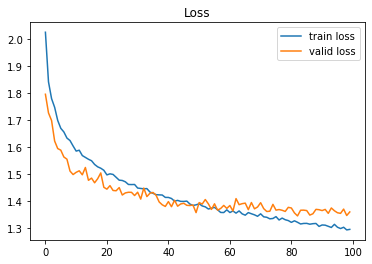

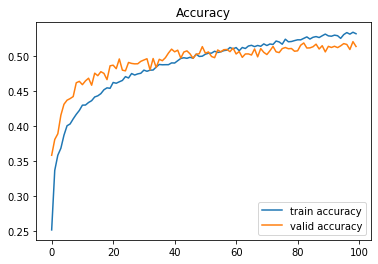

In [18]:
import matplotlib.pyplot as plt

def showScore(history):
    train_loss = history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = history["accuracy"]
    valid_acc = history["val_accuracy"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()
    
showScore(model.history.history)

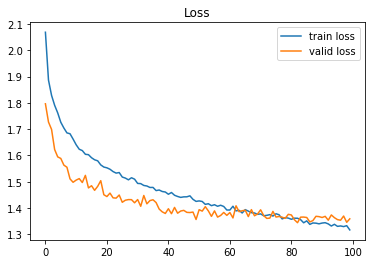

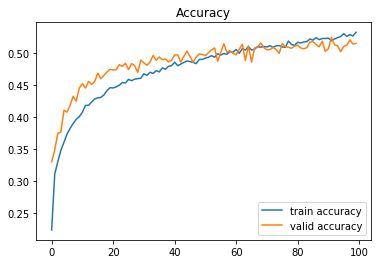

In [19]:
showScore(model_5L.history.history)

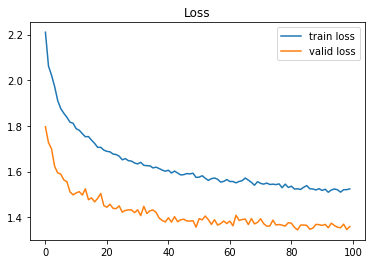

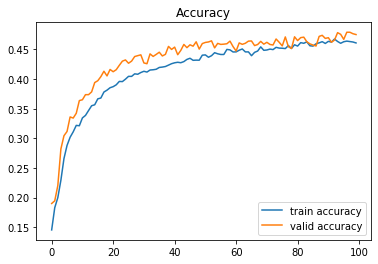

In [20]:
showScore(model_10L.history.history)